In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
data = pd.read_csv('data/2017/2017_data.csv')
data.head(50)

,GEO_ID,NAME,GEO_ID_F,NAICS2017,INDGROUP,SUBSECTOR,NAICS2017_F,NAICS2017_LABEL,INDLEVEL,SECTOR,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNER_VET,OWNER_VET_LABEL,QDESC,QDESC_LABEL,OWNCHAR,OWNCHAR_LABEL,YEAR,OWNPDEMP,OWNPDEMP_PCT,OWNPDEMP_S,OWNPDEMP_PCT_S
0,id,Geographic Area Name,Geo Footnote,2017 NAICS code,Industry group,SUBSECTOR,2017 NAICS Footnote,Meaning of NAICS code,Industry level,NAICS economic sector,Sex code,Meaning of Sex code,Ethnicity code,Meaning of Ethnicity code,Race code,Meaning of Race code,Veteran code,Meaning of Veteran code,Question description code,Meaning of Question description code,Owner characteristic code,Meaning of Owner characteristic code,Year,Number of owners of respondent employer firms,Percent of number of owners of respondent empl...,Relative standard error of number of owners of...,Standard error of percent of number of owners ...
1,0100000US,United States,NaN,54,NaN,NaN,NaN,"Professional, scientific, and technical services",2,54,001,All owners of respondent firms,001,All owners of respondent firms,00,All owners of respondent firms,001,All owners of respondent firms,O02,YRACQBUS,CG,Before 1980,2018,17945,2.8,3.6,0.1
2,0100000US,United States,NaN,54,NaN,NaN,NaN,"Professional, scientific, and technical services",2,54,001,All owners of respondent firms,001,All owners of respondent firms,30,White,001,All owners of respondent firms,O02,YRACQBUS,CG,Before 1980,2018,17451,3.0,3.7,0.1
3,0100000US,United States,NaN,54,NaN,NaN,NaN,"Professional, scientific, and technical services",2,54,001,All owners of respondent firms,001,All owners of respondent firms,40,Black or African American,001,All owners of respondent firms,O02,YRACQBUS,CG,Before 1980,2018,79,0.7,32.5,0.2
4,0100000US,United States,NaN,54,NaN,NaN,NaN,"Professional, scientific, and technical services",2,54,001,All owners of respondent firms,001,All owners of respondent firms,50,American Indian and Alaska Native,001,All owners of respondent firms,O02,YRACQBUS,CG,Before 1980,2018,47,1.6,59.9,0.9
5,0100000US,United States,NaN,54,NaN,NaN,NaN,"Professional, scientific, and technical services",2,54,001,All owners of respondent firms,001,All owners of respondent firms,60,Asian,001,All owners of respondent firms,O02,YRACQBUS,CG,Before 1980,2018,408,0.8,14.3,0.1
6,0100000US,United States,NaN,54,NaN,NaN,NaN,"Professional, scientific, and technical services",2,54,001,All owners of respondent firms,001,All owners of respondent firms,90,Minority,001,All owners of respondent firms,O02,YRACQBUS,CG,Before 1980,2018,991,1.1,20.0,0.2
7,0100000US,United States,NaN,54,NaN,NaN,NaN,"Professional, scientific, and technical services",2,54,001,All owners of respondent firms,001,All owners of respondent firms,92,Nonminority,001,All owners of respondent firms,O02,YRACQBUS,CG,Before 1980,2018,16952,3.1,4.1,0.1
8,0100000US,United States,NaN,54,NaN,NaN,NaN,"Professional, scientific, and technical services",2,54,001,All owners of respondent firms,020,Hispanic,00,All owners of respondent firms,001,All owners of respondent firms,O02,YRACQBUS,CG,Before 1980,2018,492,1.6,37.4,0.6
9,0100000US,United States,NaN,54,NaN,NaN,NaN,"Professional, scientific, and technical services",2,54,001,All owners of respondent firms,029,Non-Hispanic,00,All owners of respondent firms,001,All owners of respondent firms,O02,YRACQBUS,CG,Before 1980,2018,17453,2.8,4.0,0.1


In [3]:
data17 = data[1:]
data17['OWNPDEMP'].replace({'D':'1'}, inplace=True)
data17['OWNPDEMP'] = pd.to_numeric(data17['OWNPDEMP'])
data17 = data17[data17['OWNCHAR_LABEL'] == 'Total reporting']
data17 = data17[data17['OWNER_RACE_LABEL'] != 'Minority']
data17 = data17[data17['OWNER_RACE_LABEL'] != 'Nonminority']
data17 = data17[data17['OWNER_VET_LABEL'] == 'All owners of respondent firms']

/home/alex/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-3-9b6af1fa4dc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data17['OWNPDEMP'] = pd.to_numeric(data17['OWNPDEMP'])


In [4]:
df17 = data17.groupby(['OWNER_RACE_LABEL', 'OWNER_ETH_LABEL','OWNER_SEX_LABEL']).agg({'OWNPDEMP':'sum'})
df17.rename(columns={'OWNPDEMP':'count'},inplace=True)
df17

count
OWNER_RACE_LABEL                           OWNER_ETH_LABEL                OWNER_SEX_LABEL                        
All owners of respondent firms             All owners of respondent firms All owners of respondent firms  5729619
                                                                          Female                          1713412
                                                                          Male                            4016215
                                           Hispanic                       All owners of respondent firms   262745
                                                                          Female                            92841
                                                                          Male                             169906
                                           Non-Hispanic                   All owners of respondent firms  5466864
                                                                          Female                          1620575
                                                                          Male                            3846296
American Indian and Alaska Native          All owners of respondent firms All owners of respondent firms    25359
                                                                          Female                            10262
                                                                          Male                              15086
Asian                                      All owners of respondent firms All owners of respondent firms   450296
                                                                          Female                           169048
                                                                          Male                             281241
Black or African American                  All owners of respondent firms All owners of respondent firms   104969
                                                                          Female                            40321
                                                                          Male                              64639
Native Hawaiian and Other Pacific Islander All owners of respondent firms All owners of respondent firms     5817
                                                                          Female                             1183
                                                                          Male                               4636
White                                      All owners of respondent firms All owners of respondent firms  5195967
                                                                          Female                          1511310
                                                                          Male                            3684665

In [5]:
df17['percent'] = 100 * (df17['count'] / df17.iloc[0,0])
df17.head(100)

count  \
OWNER_RACE_LABEL                           OWNER_ETH_LABEL                OWNER_SEX_LABEL                           
All owners of respondent firms             All owners of respondent firms All owners of respondent firms  5729619   
                                                                          Female                          1713412   
                                                                          Male                            4016215   
                                           Hispanic                       All owners of respondent firms   262745   
                                                                          Female                            92841   
                                                                          Male                             169906   
                                           Non-Hispanic                   All owners of respondent firms  5466864   
                                                                          Female                          1620575   
                                                                          Male                            3846296   
American Indian and Alaska Native          All owners of respondent firms All owners of respondent firms    25359   
                                                                          Female                            10262   
                                                                          Male                              15086   
Asian                                      All owners of respondent firms All owners of respondent firms   450296   
                                                                          Female                           169048   
                                                                          Male                             281241   
Black or African American                  All owners of respondent firms All owners of respondent firms   104969   
                                                                          Female                            40321   
                                                                          Male                              64639   
Native Hawaiian and Other Pacific Islander All owners of respondent firms All owners of respondent firms     5817   
                                                                          Female                             1183   
                                                                          Male                               4636   
White                                      All owners of respondent firms All owners of respondent firms  5195967   
                                                                          Female                          1511310   
                                                                          Male                            3684665   

                                                                                                             percent  
OWNER_RACE_LABEL                           OWNER_ETH_LABEL                OWNER_SEX_LABEL                             
All owners of respondent firms             All owners of respondent firms All owners of respondent firms  100.000000  
                                                                          Female                           29.904467  
                                                                          Male                             70.095673  
                                           Hispanic                       All owners of respondent firms    4.585732  
                                                                          Female                            1.620370  
                                                                          Male                              2.965398  
                                           Non-Hispanic                   All owners of respondent firms   95.414

In [6]:
percent17 = df17.sort_values('percent',ascending=False)
percent17

count  \
OWNER_RACE_LABEL                           OWNER_ETH_LABEL                OWNER_SEX_LABEL                           
All owners of respondent firms             All owners of respondent firms All owners of respondent firms  5729619   
                                           Non-Hispanic                   All owners of respondent firms  5466864   
White                                      All owners of respondent firms All owners of respondent firms  5195967   
All owners of respondent firms             All owners of respondent firms Male                            4016215   
                                           Non-Hispanic                   Male                            3846296   
White                                      All owners of respondent firms Male                            3684665   
All owners of respondent firms             All owners of respondent firms Female                          1713412   
                                           Non-Hispanic                   Female                          1620575   
White                                      All owners of respondent firms Female                          1511310   
Asian                                      All owners of respondent firms All owners of respondent firms   450296   
                                                                          Male                             281241   
All owners of respondent firms             Hispanic                       All owners of respondent firms   262745   
                                                                          Male                             169906   
Asian                                      All owners of respondent firms Female                           169048   
Black or African American                  All owners of respondent firms All owners of respondent firms   104969   
All owners of respondent firms             Hispanic                       Female                            92841   
Black or African American                  All owners of respondent firms Male                              64639   
                                                                          Female                            40321   
American Indian and Alaska Native          All owners of respondent firms All owners of respondent firms    25359   
                                                                          Male                              15086   
                                                                          Female                            10262   
Native Hawaiian and Other Pacific Islander All owners of respondent firms All owners of respondent firms     5817   
                                                                          Male                               4636   
                                                                          Female                             1183   

                                                                                                             percent  
OWNER_RACE_LABEL                           OWNER_ETH_LABEL                OWNER_SEX_LABEL                             
All owners of respondent firms             All owners of respondent firms All owners of respondent firms  100.000000  
                                           Non-Hispanic                   All owners of respondent firms   95.414093  
White                                      All owners of respondent firms All owners of respondent firms   90.686082  
All owners of respondent firms             All owners of respondent firms Male                             70.095673  
                                           Non-Hispanic                   Male                             67.130048  
White                                      All owners of respondent firms Male                             64.309075  
All owners of respondent firms             All owners of respondent firms Female                           29.904

In [7]:
consolidate17 = percent17[1:].drop(index='All owners of respondent firms',level=0)
# consolidate17 = consolidate17[1:].drop(index='All owners of respondent firms',level=1)
consolidate17

count  \
OWNER_RACE_LABEL                           OWNER_ETH_LABEL                OWNER_SEX_LABEL                           
White                                      All owners of respondent firms All owners of respondent firms  5195967   
                                                                          Male                            3684665   
                                                                          Female                          1511310   
Asian                                      All owners of respondent firms All owners of respondent firms   450296   
                                                                          Male                             281241   
                                                                          Female                           169048   
Black or African American                  All owners of respondent firms All owners of respondent firms   104969   
                                                                          Male                              64639   
                                                                          Female                            40321   
American Indian and Alaska Native          All owners of respondent firms All owners of respondent firms    25359   
                                                                          Male                              15086   
                                                                          Female                            10262   
Native Hawaiian and Other Pacific Islander All owners of respondent firms All owners of respondent firms     5817   
                                                                          Male                               4636   
                                                                          Female                             1183   

                                                                                                            percent  
OWNER_RACE_LABEL                           OWNER_ETH_LABEL                OWNER_SEX_LABEL                            
White                                      All owners of respondent firms All owners of respondent firms  90.686082  
                                                                          Male                            64.309075  
                                                                          Female                          26.377147  
Asian                                      All owners of respondent firms All owners of respondent firms   7.859092  
                                                                          Male                             4.908546  
                                                                          Female                           2.950423  
Black or African American                  All owners of respondent firms All owners of respondent firms   1.832042  
                                                                          Male                             1.128155  
                                                                          Female                           0.703729  
American Indian and Alaska Native          All owners of respondent firms All owners of respondent firms   0.442595  
                                                                          Male                             0.263298  
                                                                          Female                           0.179104  
Native Hawaiian and Other Pacific Islander All owners of respondent firms All owners of respondent firms   0.101525  
                                                                          Male                             0.080913  
                                                                          Female                           0.020647

In [8]:
race17 = consolidate17.drop(index='Male',level=2)
race17 = race17.drop(index='Female',level=2)
race17 = race17.reset_index()
race17 = race17.drop(columns=['OWNER_ETH_LABEL','OWNER_SEX_LABEL', 'count']).rename(columns={'OWNER_RACE_LABEL':'race'})
race17

,race,percent
0,White,90.686082
1,Asian,7.859092
2,Black or African American,1.832042
3,American Indian and Alaska Native,0.442595
4,Native Hawaiian and Other Pacific Islander,0.101525


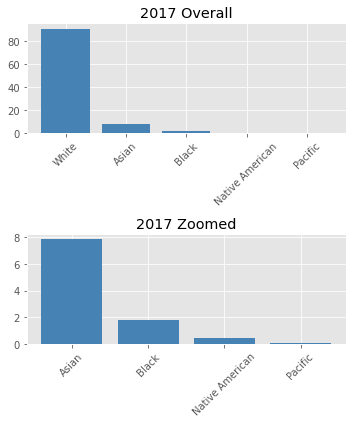

In [10]:
zoom_race17 = race17[race17['race'] != 'White']
x = np.arange(len(race17['race']))
x2 = np.arange(len(zoom_race17['race']))
xlist = ['White','Asian','Black', 'Native American', 'Pacific']
fig, ax = plt.subplots(2,1,figsize=(5,6))

ax[0].bar(x, race17['percent'], color='steelblue')
ax[0].set_xticks(x)
ax[0].set_xticklabels(xlist);

plt.setp(ax[0].get_xticklabels(), rotation=45);

ax[1].bar(x2, zoom_race17['percent'], color='steelblue')
ax[1].set_xticks(x2)
ax[1].set_xticklabels(xlist[1:]);

plt.setp(ax[1].get_xticklabels(), rotation=45);

ax[0].set_title("2017 Overall");
ax[1].set_title("2017 Zoomed");
fig.tight_layout()
plt.savefig('2017_racez.png')